<a href="https://colab.research.google.com/github/bikas1012/Term-1/blob/master/Term_III_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TERM III Project
### House Sale Price Prediction 
                                              

## 1. Problem Statement

__House Sale__ price  need to predict based on the paramters provided in the data 
- We want to find a function that given input various features/factors of houses to __predicts the Property Sale Price in dollars__.

- Which feature/attribute will __contribute__ to sales?

- Visualize the __relationship__ between the _features/attribute_ and the _response_ using scatter plots.

##2. Data Loading and Description
House price data captures the features/factors of houses. Many of these features / factors contribute to Property sale price. Purpose of this exercise is to evaluate the factors which are impacting property sale price.




####Importing Packages

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# allow plots to appear directly in the notebook
%matplotlib inline

#### Importing the Dataset

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/house_data.csv', index_col=0)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
data.shape

(1460, 80)

There are 80 features of properties listed in data and Sales Price is provided for property.

## 3. Visualisation of Data

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

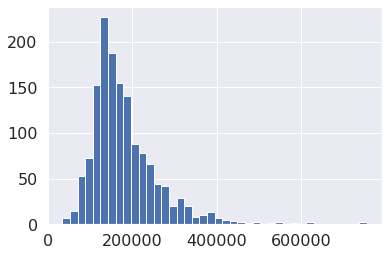

In [0]:
data['SalePrice'].hist(bins = 40)

We can clearly see that the target variable has a normal ditribution that is skewed towards the left. Now let's calculate the Skewness and Kurtosis

In [0]:
#skewness & kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


There are many columns to work with, so first need to find out the correlations to get a better idea of which columns are strongly related to the Sale Price. This will help us eliminating the features that won't do a good job predicting the Sale Price.

Before working on Individual Features let's first check each variable

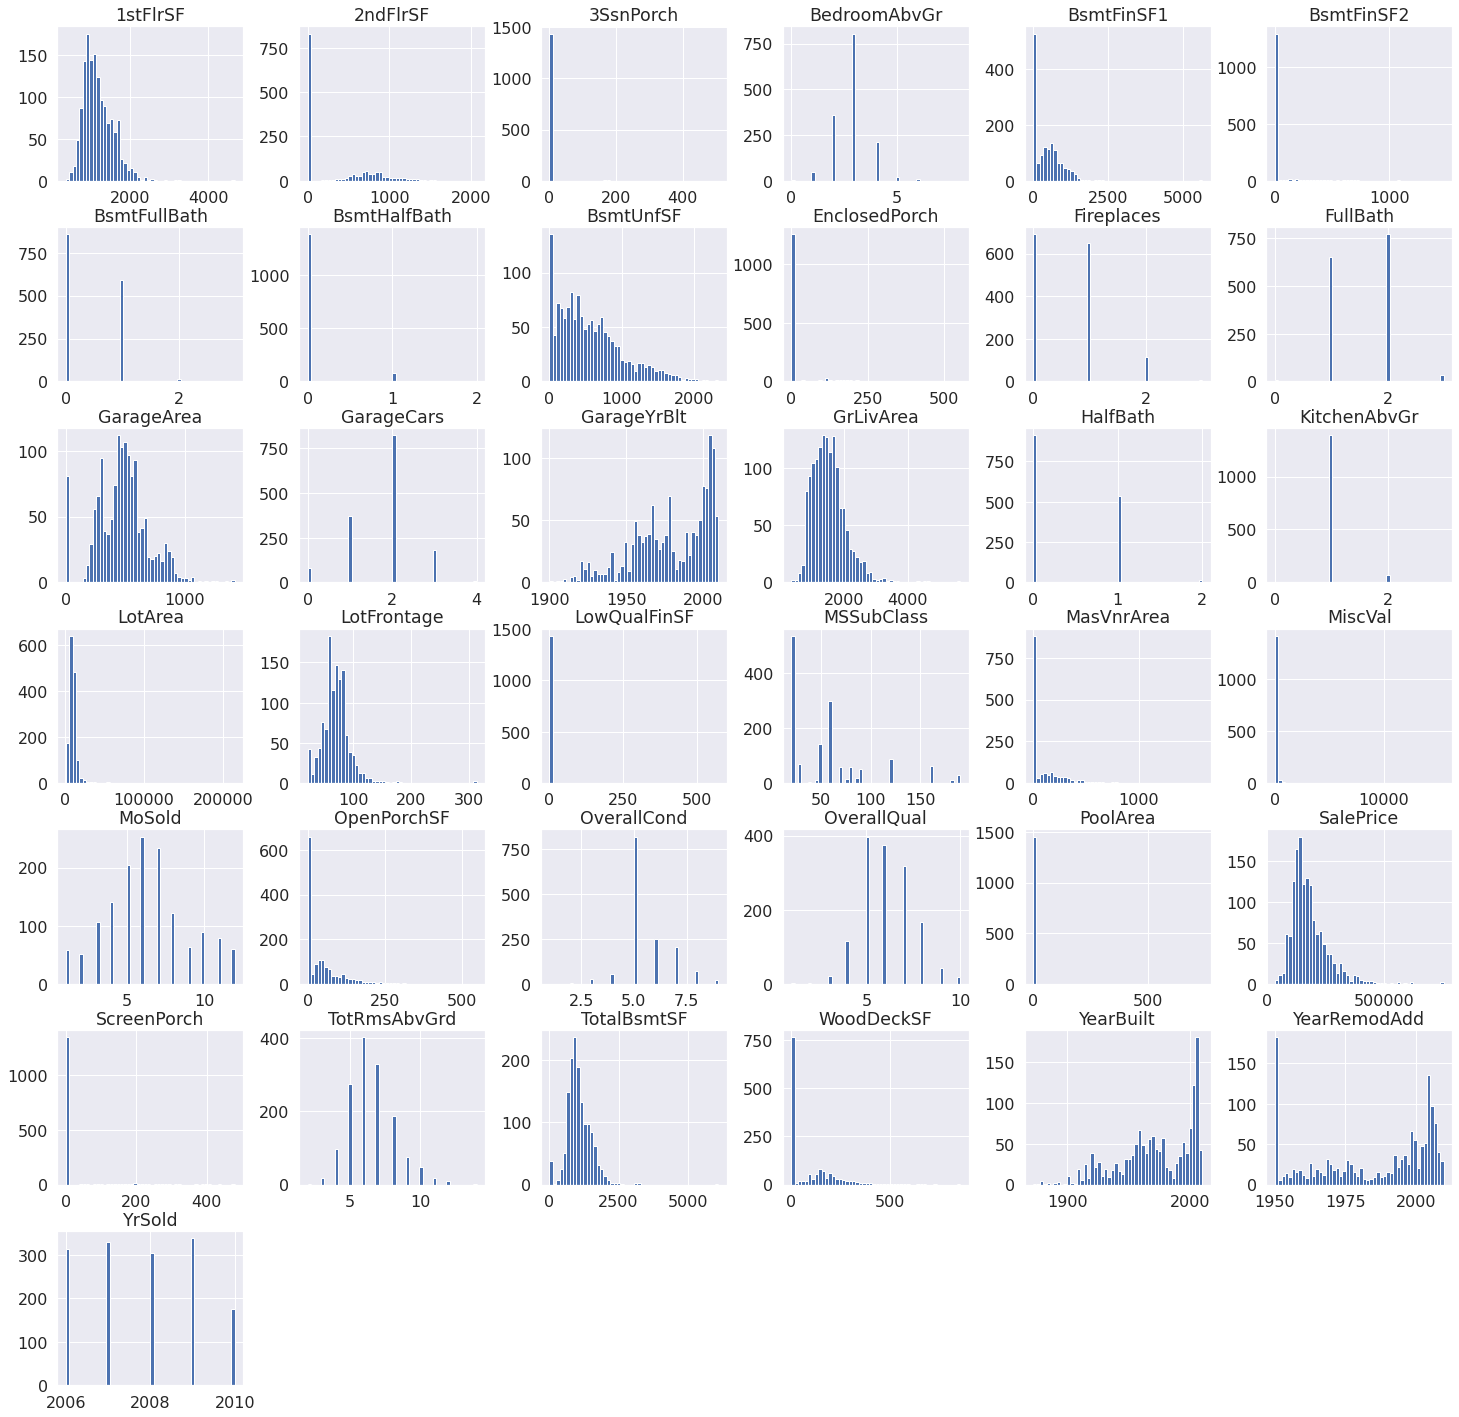

In [0]:
data.hist(bins=50, figsize=(25,25))
plt.show()

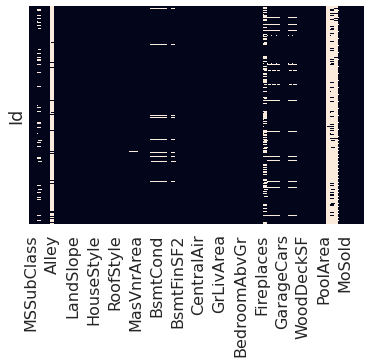

In [0]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [0]:
data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,

In [0]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Calculating and plotting heatmap correlation

In [0]:
dcorr = data.corr()
dcorr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


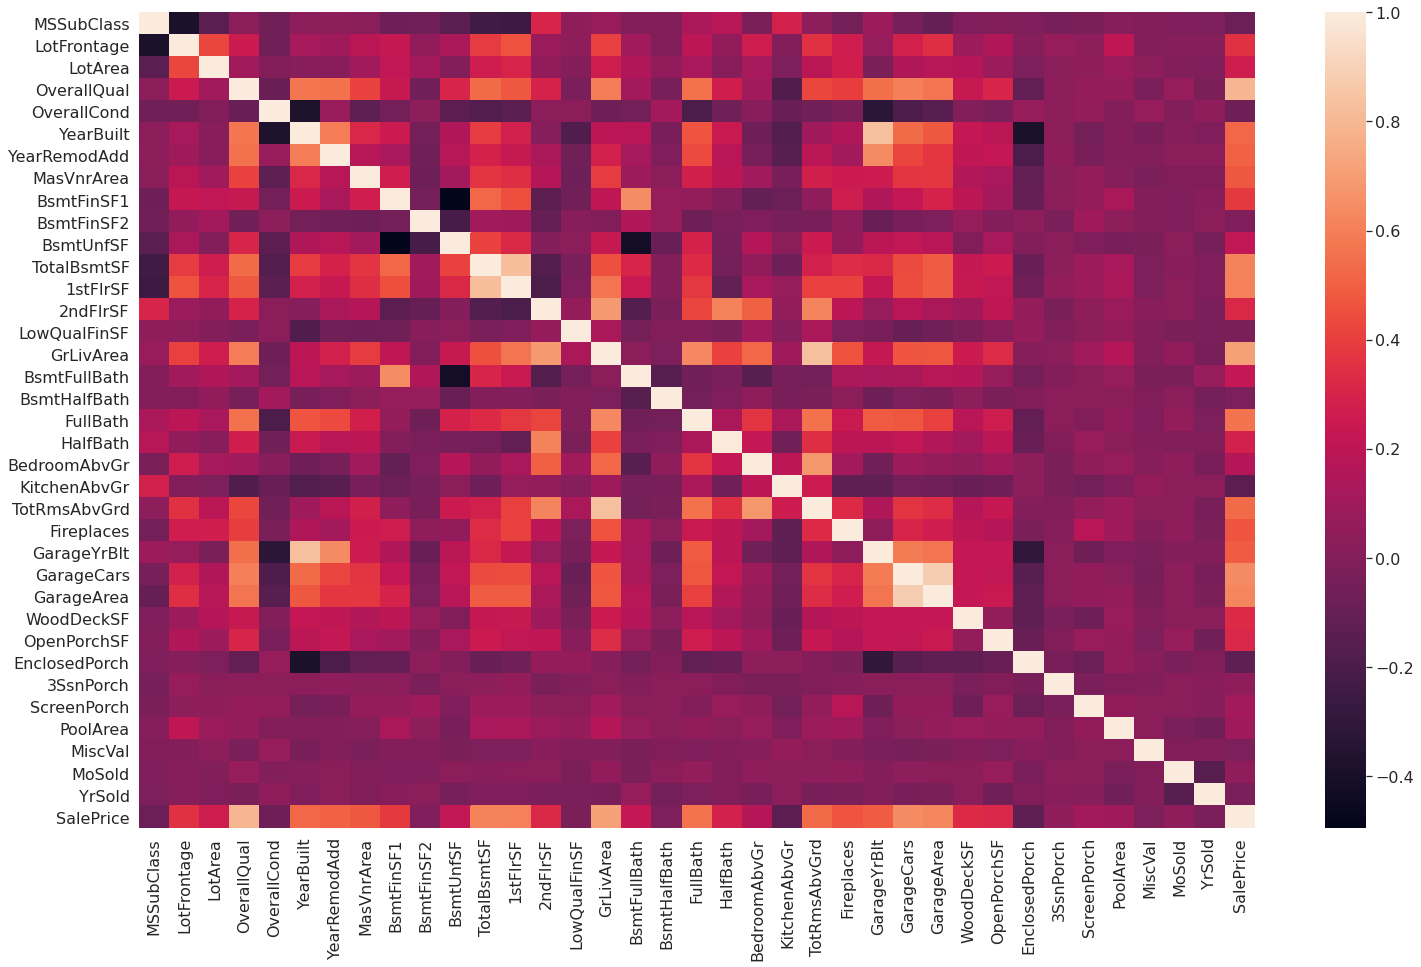

In [0]:
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.45)
sns.heatmap(data.corr(), annot=False );

Let's consider top 10 features which are highly correlated 

In [0]:
correlations = dcorr["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:10]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [0]:
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

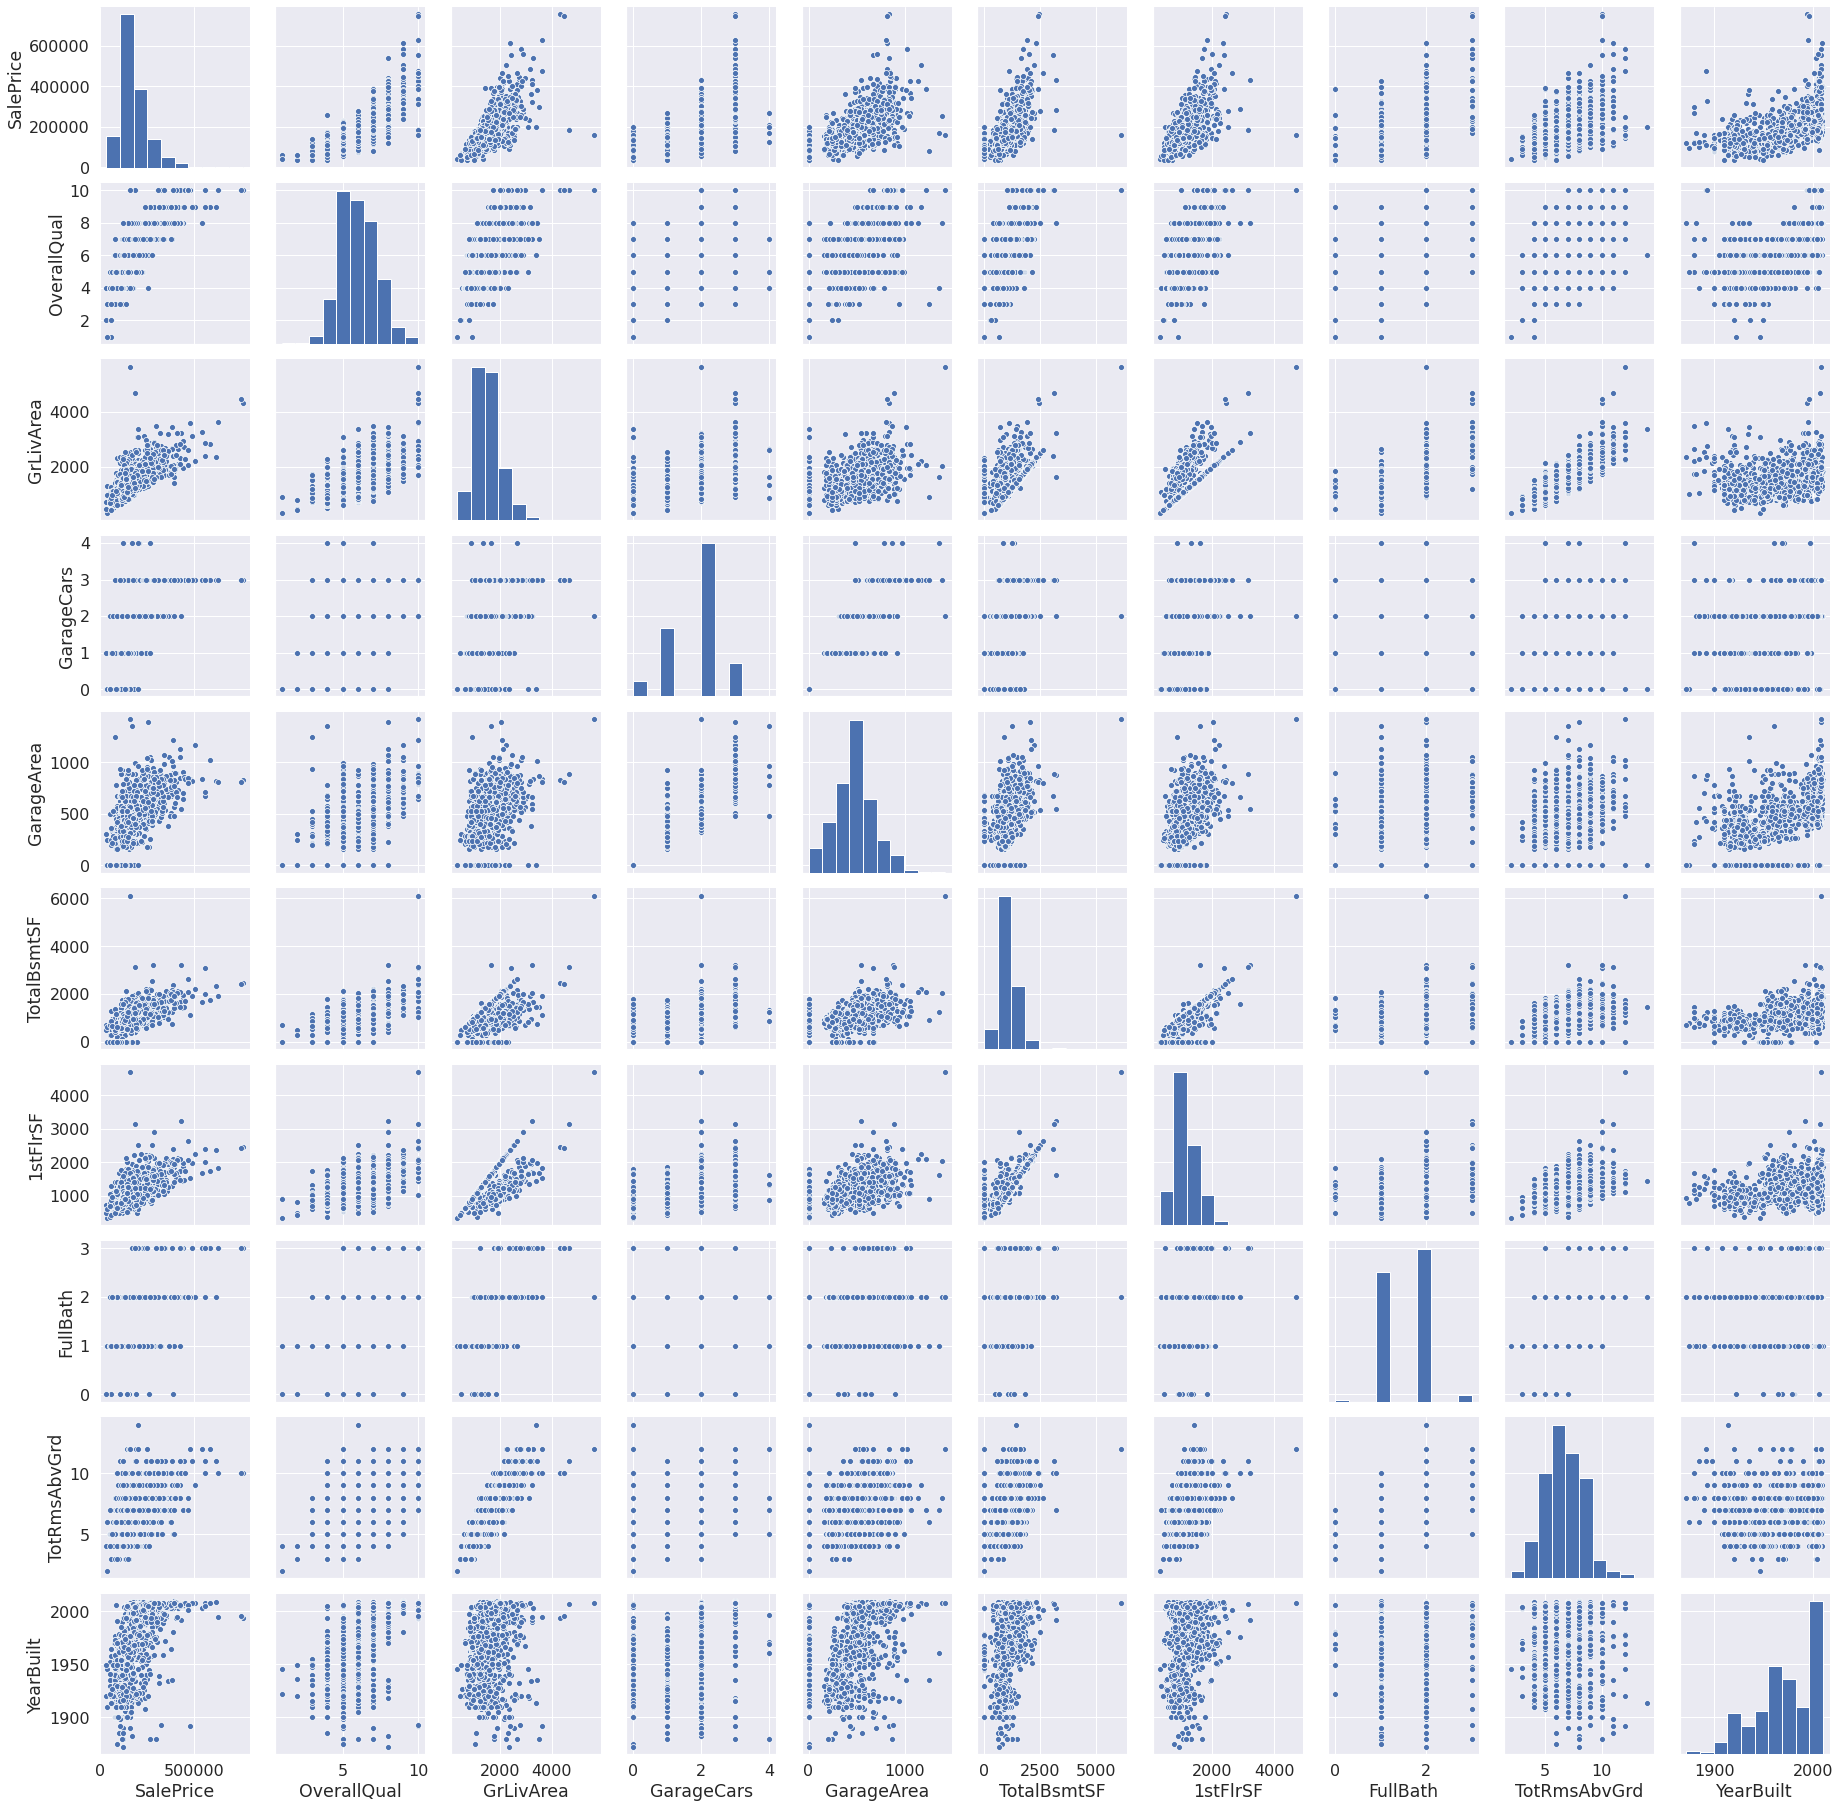

In [0]:
sns.pairplot(data[features], height = 2.5)
plt.show();

## Imputing Null Values

In this large data, we have a lot of missing values in the columns. In order to effectively train our model, we must first deal with the missing values. There are missing values for both numerical and categorical data.

For numerical imputing, we will try to fill the missing values with the mean. For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column.



In fact, the NaN values actually mean something in some columns. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. So, we will try to fill in the null cell with a new category called "None".


In [0]:
##missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.query('Total > 0')

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


In [0]:
#Based on the description data file provided, all the variables who have meaningfull Nan

null_with_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [0]:
#Replacing every Nan value with "None"

for i in null_with_meaning:
    data[i].fillna("None", inplace=True)

Now let's check values which are not recorded

In [0]:
manynull = missing_data[missing_data.sum(axis=1) > 200]  #a lot of missing values
fewnull = missing_data[(missing_data.sum(axis=1) > 0) & (missing_data.sum(axis=1) < 200)]  #few missing values

In [0]:
manynull

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397


In [0]:
fewnull

,Total,Percent
GarageType,81,0.055479
GarageCond,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageYrBlt,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtFinType1,37,0.025342


For few null values let's replace the values with mean of that respective column


In [0]:
data["GarageYrBlt"].fillna(data["GarageYrBlt"].mean(), inplace=True)
data["MasVnrArea"].fillna(data["MasVnrArea"].mean(), inplace=True)

data["MasVnrType"].fillna("None", inplace=True)


Similarly let's work on many Null values column

In [0]:
typedata = data.dtypes #type of each feature in data: int, float, object
numdata = typedata[(typedata == int) | (typedata == float)] #numerical values are either type int or float
catdata = typedata[typedata == object] #categorical values are type object

Numerical Imputing

In [0]:
numval = list(numdata.index)
print(numval)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [0]:
for i in numval:
     data[i].fillna(data[i].mean(), inplace=True)

Categorical Imputing

In [0]:
data.shape

(1460, 80)

In [0]:
catval = list(catdata.index)
catval

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [0]:
fill_cat = []

for i in catval:
    if i in list(fewnull.index):
        fill_cat.append(i)
print(fill_cat)

['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [0]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = []

for i in fill_cat:
    most_common.append(most_common_term(data[i]))
    
most_common

['None', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Attchd', 'Unf', 'TA', 'TA']

In [0]:
mostcomon_each = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
mostcomon_each


{'BsmtCond': ['TA'],
 'BsmtExposure': ['No'],
 'BsmtFinType1': ['Unf'],
 'BsmtFinType2': ['Unf'],
 'BsmtQual': ['TA'],
 'Electrical': ['SBrkr'],
 'GarageFinish': ['Unf'],
 'GarageType': ['Attchd'],
 'MasVnrType': ['None']}

In [0]:
k = 0
for i in fill_cat:  
    data[i].fillna(most_common[k], inplace=True)
    k += 1


Let's check ny missing value column is left

In [0]:
##missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.query('Total > 0')

,Total,Percent


## 5. Feature Engineering

Skew is: 1.8828757597682129


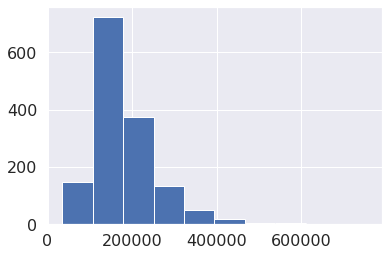

In [0]:
# Determining the Skewness of data 
print ("Skew is:", data.SalePrice.skew())

plt.hist(data.SalePrice)
plt.show()

Skew is: 0.12134661989685329


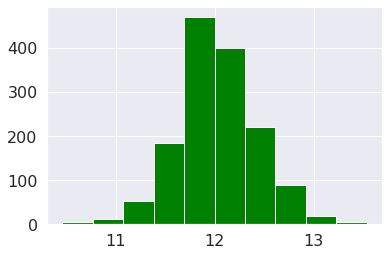

In [0]:
# Sales price is right skewed so performing  log transformation so that we get the skeness near to zero 
data['Skewed_1'] = np.log(data['SalePrice']+1)
print ("Skew is:", data['Skewed_1'].skew())
plt.hist(data['Skewed_1'], color='green')
plt.show()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

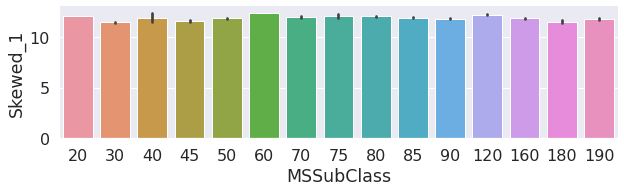

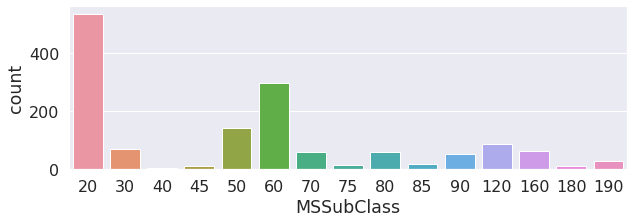

In [0]:
sns.catplot('MSSubClass', 'Skewed_1', data=data,kind='bar',height=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=data)
data['MSSubClass'].value_counts()

Observation

MSSubclass 60 has highest salesprice, but sales of houses is more with class 20

---



RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

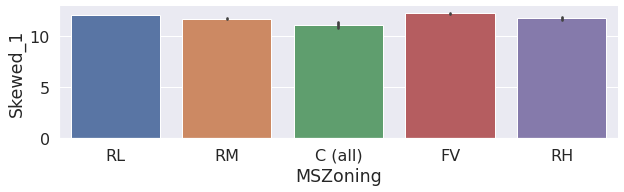

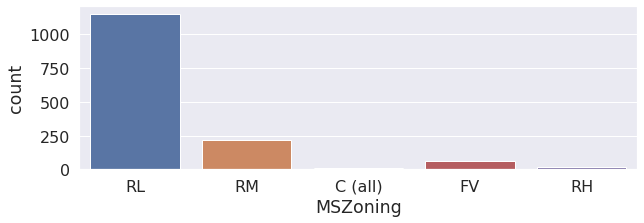

In [0]:
sns.catplot('MSZoning', 'Skewed_1', data=data,kind='bar',height=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=data, ax=axis1)
data['MSZoning'].value_counts()

Observation
Highest Property Salesprice is observed in "FV" Zone but sales of houses is more in Zone "RL"

Compare 2 Features MSZoning and MsSubClass for Property Salesprice

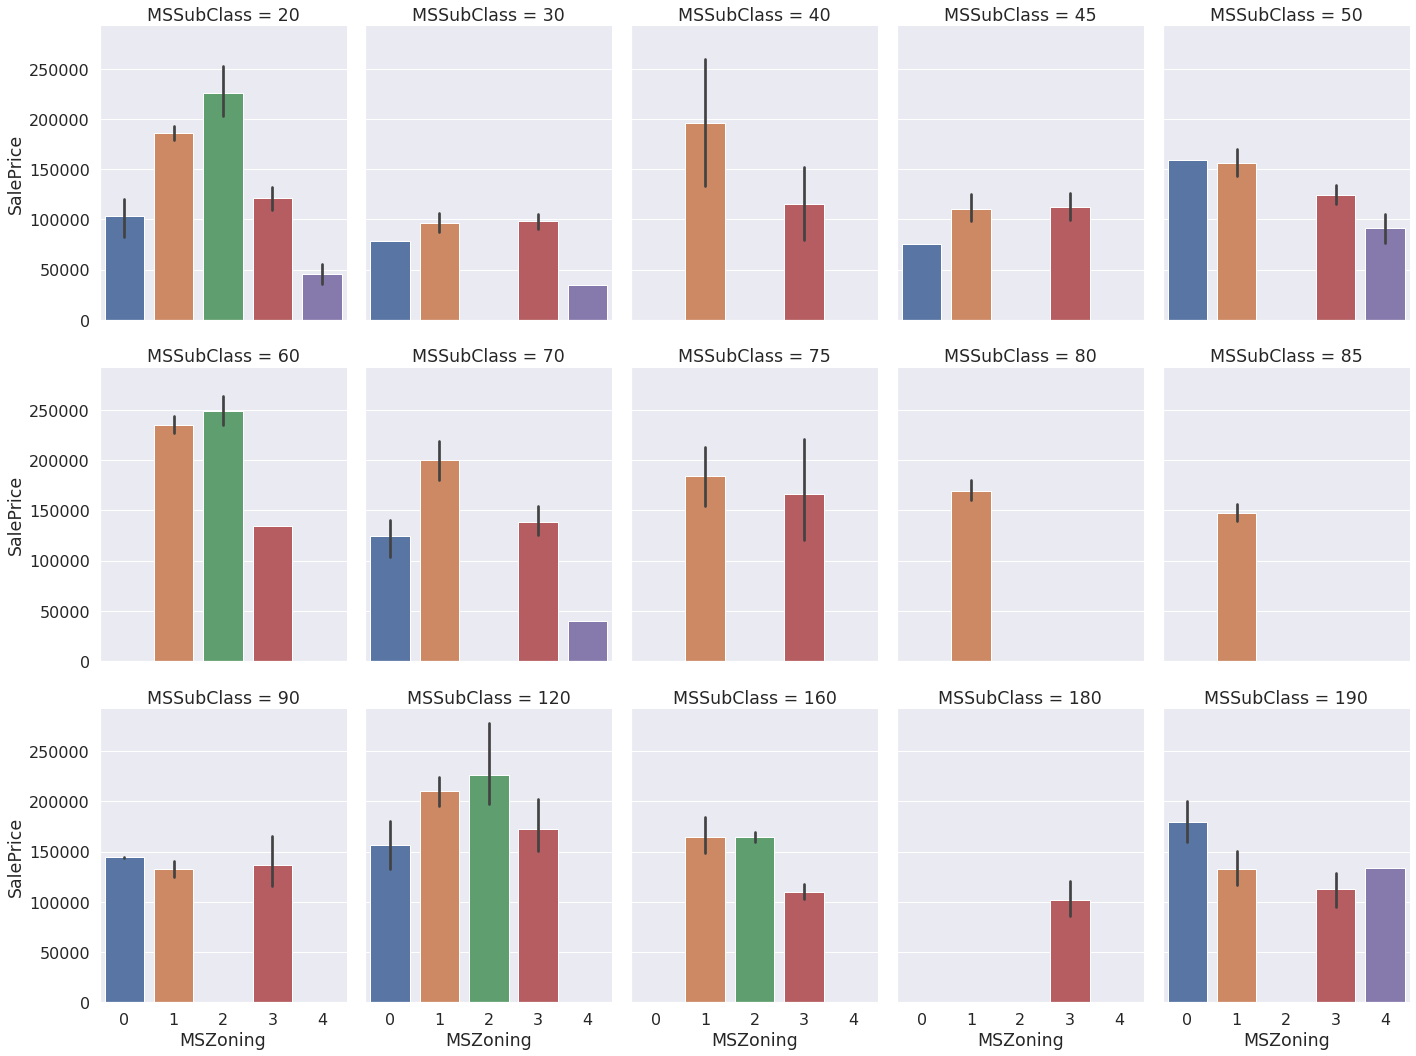

In [0]:
sns.catplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=data, kind='bar', col_wrap=5, aspect=0.8)

Observation 
MSSubclass 60 in MS Subzoe FV has more salesPrice

In [0]:
catval= list(catdata.index)
print(catval)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [0]:
for i in catval:
    feature_set = set(data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        data.loc[data[i] == j, i] = feature_list.index(j)
       

In [0]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_1
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,1,65.0,8450,0,1,1,1,0,4,2,8,7,6,1,4,7,5,2003,2003,1,7,3,4,2,196.0,2,0,0,2,0,3,5,706,0,0,150,856,4,4,...,1,856,854,0,1710,1,0,2,1,3,1,2,8,5,0,4,1,2003.0,2,2,548,0,0,2,0,61,0,0,0,0,1,4,4,0,2,2008,1,3,208500,12.247699
2,20,1,80.0,9600,0,1,1,1,0,1,2,15,5,6,1,6,6,8,1976,1976,1,7,2,3,1,0.0,0,0,5,2,0,1,3,978,0,0,284,1262,4,4,...,1,1262,0,0,1262,0,1,2,0,3,1,0,6,5,1,0,1,1976.0,2,2,460,0,0,2,298,0,0,0,0,0,1,4,4,0,5,2007,1,3,181500,12.109016
3,60,1,68.0,11250,0,1,3,1,0,4,2,8,7,6,1,4,7,5,2001,2002,1,7,3,4,2,162.0,2,0,0,2,0,0,5,486,0,0,434,920,4,4,...,1,920,866,0,1786,1,0,2,1,3,1,2,6,5,1,0,1,2001.0,2,2,608,0,0,2,0,42,0,0,0,0,1,4,4,0,9,2008,1,3,223500,12.317171
4,70,1,60.0,9550,0,1,3,1,0,0,2,18,7,6,1,4,7,5,1915,1970,1,7,14,9,1,0.0,0,0,3,0,3,3,3,216,0,0,540,756,4,3,...,1,961,756,0,1717,1,0,1,0,3,1,2,7,5,1,3,2,1998.0,1,3,642,0,0,2,0,35,272,0,0,0,1,4,4,0,2,2006,1,4,140000,11.849405
5,60,1,84.0,14260,0,1,3,1,0,1,2,10,7,6,1,4,8,5,2000,2000,1,7,3,4,2,350.0,2,0,0,2,0,2,5,655,0,0,490,1145,4,4,...,1,1145,1053,0,2198,1,0,2,1,4,1,2,9,5,1,0,1,2000.0,2,3,836,0,0,2,192,84,0,0,0,0,1,4,4,0,12,2008,1,3,250000,12.429220


In [0]:
data.OverallQual.unique()


array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [0]:
overallqty_pivot = data.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
overallqty_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,87500
4,108000
5,133000
6,160000
7,200141
8,270000
9,345000


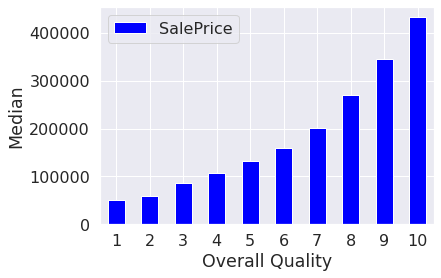

In [0]:
overallqty_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

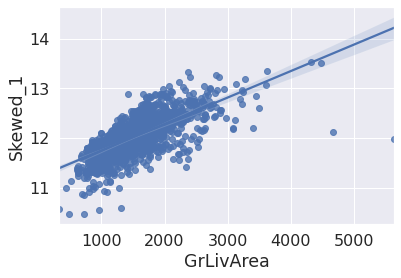

In [0]:
sns.regplot(x='GrLivArea',y='Skewed_1',data=data)

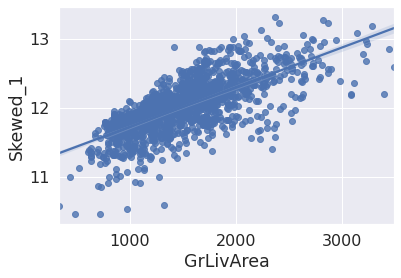

In [0]:
  #Removing outliers
  data = data[data['GrLivArea'] < 3500]
  sns.regplot(x='GrLivArea',y='Skewed_1',data=data)

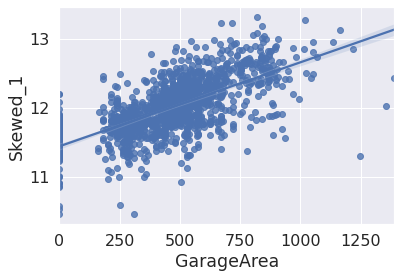

In [0]:
sns.regplot(x='GarageArea',y='Skewed_1',data=data)

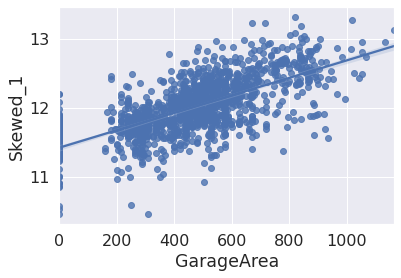

In [0]:
#Removing outliers
data = data[data['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_1',data=data)

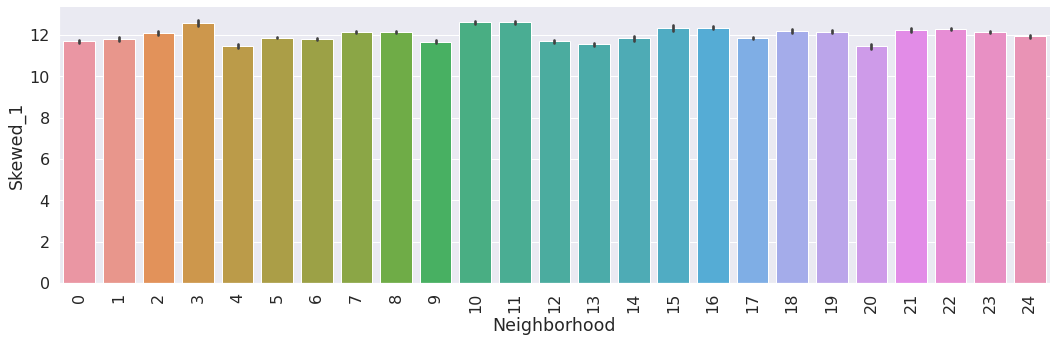

In [0]:
g = sns.catplot(x='Neighborhood', y='Skewed_1', data=data, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

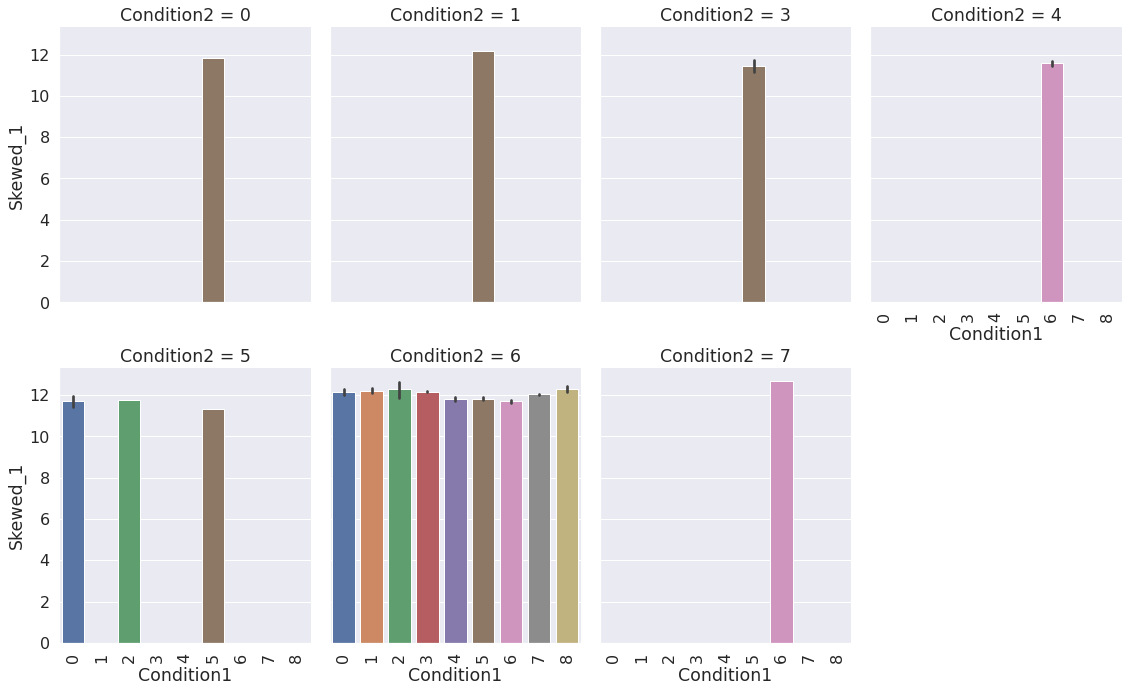

In [0]:
g = sns.catplot(x='Condition1', y='Skewed_1', col='Condition2', data=data, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [0]:
data['SaleCondition'].value_counts()

3    1193
0     121
4     100
1      20
2      12
5       4
Name: SaleCondition, dtype: int64

In [0]:
data['SaleType'].value_counts()

1    1262
3     118
6      43
4       8
7       5
2       5
8       4
5       3
0       2
Name: SaleType, dtype: int64

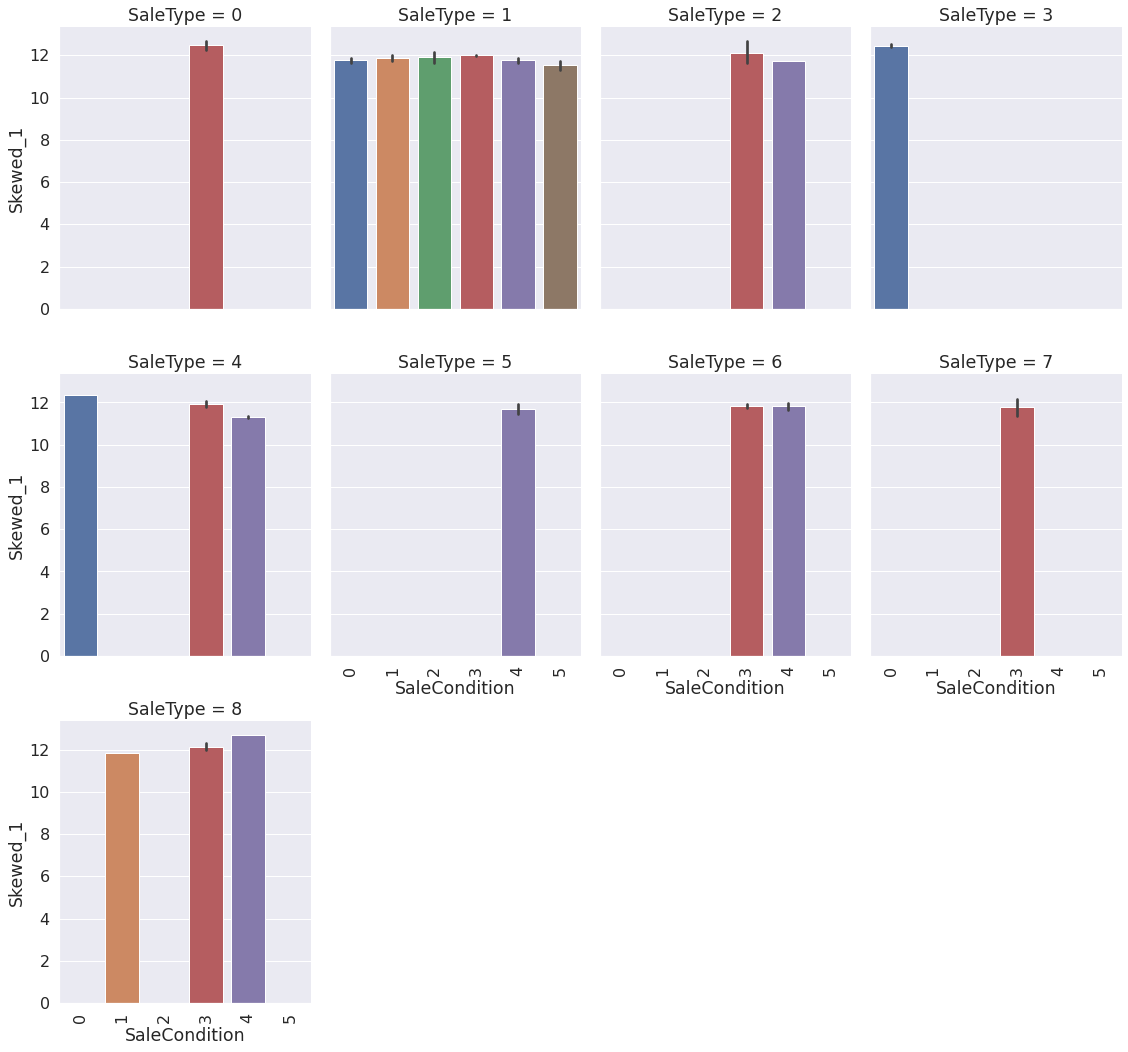

In [0]:
g = sns.catplot(x='SaleCondition', y='Skewed_1', col='SaleType', data=data, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

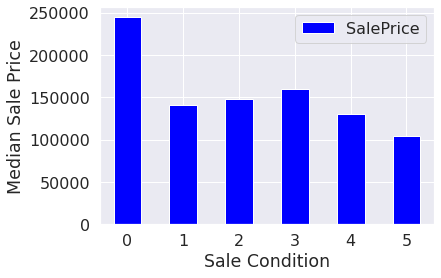

In [0]:
cond_pivot = data.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
cond_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()


## 6. Process ML Models

In [0]:
#Importing all the librairies we'll need

from sklearn.linear_model import LinearRegression
##from sklearn.linear_model import Lasso
##from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score ##, KFold


Defining Training -  Test set

For any machine learning model, we always need train and test datasets. We will be building the model on the train dataset and test the performance on the test dataset. We maintain two datasets (one with the encoded categorical values and one with the original values) so we can train with the encoded dataset but use the original dataset as needed later on for model interpretation.

In [0]:
X_train = data.drop(["SalePrice","Skewed_1"], axis=1)
y_train = data["Skewed_1"]

In [0]:
X_train.shape

(1450, 79)

In [0]:
y_train.shape

(1450,)

Splitting into validation set

In [0]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [0]:
##X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_training shape: ',X_training.shape)
print('y_training shape: ',y_training.shape)
print('\nTest cases as below')
print('X_test shape: ',X_valid.shape)
print('y_test shape: ',y_valid.shape)

Train cases as below
X_training shape:  (1160, 79)
y_training shape:  (1160,)

Test cases as below
X_test shape:  (290, 79)
y_test shape:  (290,)


In [0]:
X_valid

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
876,60,2,75.000000,9000,0,1,1,1,0,4,2,22,7,6,1,4,8,5,2007,2007,1,7,11,12,1,0.0,2,0,0,2,0,2,5,64,0,0,1120,1184,4,4,1,1,1184,1426,0,2610,0,0,2,1,4,1,3,11,5,1,3,0,2007.000000,0,2,550,0,0,2,208,364,0,0,0,0,1,4,4,0,8,2007,3,0
484,120,3,32.000000,4500,0,1,1,1,0,1,2,24,7,6,3,6,6,5,1998,1998,5,7,3,4,2,116.0,0,0,0,4,0,3,5,897,0,0,319,1216,4,4,1,1,1216,0,0,1216,1,0,2,0,2,1,0,5,5,0,4,1,1998.000000,1,2,402,0,0,2,0,125,0,0,0,0,1,4,4,0,5,2006,1,3
1301,60,1,70.049958,10762,0,1,3,1,0,2,2,7,7,6,1,4,7,5,1999,1999,1,7,3,4,1,344.0,2,0,0,2,0,3,5,694,0,0,284,978,4,4,1,1,1005,978,0,1983,0,0,2,1,3,1,2,9,5,1,0,1,1999.000000,0,2,490,0,0,2,0,0,0,0,0,0,1,4,4,0,5,2009,1,3
272,20,1,73.000000,39104,0,1,3,0,0,2,1,21,7,6,1,6,7,7,1954,2005,4,1,5,6,1,0.0,0,0,5,2,0,1,4,226,5,1063,96,1385,4,4,1,1,1363,0,0,1363,1,0,1,0,2,1,0,5,3,2,0,1,1954.000000,1,2,439,0,0,2,81,0,0,0,0,0,1,4,4,0,4,2008,1,3
280,60,1,83.000000,10005,0,1,1,1,0,4,2,21,7,6,1,4,7,5,1977,1977,5,7,5,6,2,299.0,0,0,5,2,0,3,2,392,0,0,768,1160,4,4,1,1,1156,866,0,2022,0,0,2,1,4,1,0,8,5,1,0,1,1977.000000,0,2,505,0,0,2,288,117,0,0,0,0,1,4,4,0,3,2008,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,60,1,70.049958,7861,0,1,3,1,0,4,2,7,7,6,1,4,6,5,2002,2003,1,7,3,4,1,0.0,2,0,0,2,0,3,5,457,0,0,326,783,4,4,1,1,807,702,0,1509,1,0,2,1,3,1,2,7,5,1,3,1,2002.000000,0,2,393,0,0,2,100,75,0,0,0,0,1,4,4,0,6,2006,1,3
1254,60,1,70.049958,17542,0,1,3,1,0,4,2,15,7,6,1,4,7,7,1974,2003,1,7,14,15,1,0.0,2,0,5,0,0,1,4,125,3,1031,36,1192,4,0,1,1,1516,651,0,2167,1,0,2,1,3,1,2,9,5,2,3,1,1974.000000,2,2,518,0,0,2,220,47,0,0,0,0,1,0,4,0,7,2007,1,3
636,190,0,60.000000,10896,0,2,1,3,0,4,2,14,5,6,4,5,6,7,1914,1995,5,7,3,4,1,0.0,1,0,5,0,1,3,4,256,0,0,1184,1440,4,4,1,2,1440,1440,515,3395,0,0,2,0,8,2,1,14,5,0,4,5,1978.506164,3,0,0,4,4,0,0,110,0,0,0,0,1,4,4,0,3,2007,1,4


In [0]:
y_valid

Id
876     12.623064
484     12.007628
1301    12.323860
272     12.394629
280     12.165256
          ...    
617     12.118339
1254    12.591338
636     12.206078
249     12.100718
963     11.951187
Name: Skewed_1, Length: 290, dtype: float64

Linear Regression Model

In [0]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_training,y_training)     ##The fit function fits the curve according to the dataset given.
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


Linear Regresssion Model done

In [0]:
lm.score(X_valid,y_valid)

0.8983255703983717

Model Evaluation Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [0]:
print(lm.intercept_)

18.01379504455626


In [0]:
print(lm.coef_)

[-8.64383666e-05 -4.17126796e-02  5.83660703e-04  2.05204978e-06
 -2.05721061e-01  2.23849376e-02  4.67437440e-03  1.01788266e-02
 -1.24687005e-01 -1.45548338e-03 -1.48390556e-02  1.14167481e-03
  6.39880755e-03  7.76037929e-03 -4.17438685e-03 -5.23447550e-03
  5.38776258e-02  5.08276770e-02  1.54427094e-03  3.56984390e-04
  1.56586343e-03  7.29200312e-03 -5.26272058e-04 -1.01704545e-03
 -1.67272591e-02  5.29387887e-05  6.61885961e-03 -9.87797407e-03
 -9.15253301e-03  9.57993591e-03 -2.12082930e-03 -6.32344691e-03
  9.85770387e-06  5.73536237e-05 -3.77574346e-03  5.78133186e-05
 -1.16767800e-05  1.03490162e-04 -7.85601290e-03  7.32480871e-03
  4.91170103e-02  2.32023224e-03  1.30629961e-04  9.47106448e-05
 -8.82690250e-05  1.37071582e-04  2.87129825e-02  7.91934896e-03
  8.34969614e-03  2.32470134e-02 -1.16440375e-02 -5.60849812e-02
  8.34844835e-03  1.06703703e-02  1.62756003e-02  3.07686090e-02
  4.72118529e-03 -1.12976828e-02 -1.16501352e-04 -7.86478687e-04
  2.69690928e-02  9.44984

In [0]:
# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(X_train.columns, lm.coef_)


Prediction from our model

In [0]:
predictions = lm.predict(X_valid)
predictions= predictions.reshape(-1,1)

We Predicted value in predictions. The predict function takes X_valid(test) data as input and using trained model to predict.


In [0]:
y_valid

Id
876     12.623064
484     12.007628
1301    12.323860
272     12.394629
280     12.165256
          ...    
617     12.118339
1254    12.591338
636     12.206078
249     12.100718
963     11.951187
Name: Skewed_1, Length: 290, dtype: float64

In [0]:
predictions

array([[12.6406934 ],
       [11.95991112],
       [12.3322076 ],
       [12.22163041],
       [12.24106927],
       [12.38499072],
       [12.32030787],
       [12.03475272],
       [11.68022346],
       [11.47683169],
       [11.50462591],
       [11.8054466 ],
       [12.42157289],
       [12.61842866],
       [12.48648445],
       [11.78027464],
       [12.19152194],
       [11.78327632],
       [12.17481145],
       [12.16460881],
       [12.21497928],
       [11.91124768],
       [11.96777426],
       [12.3830712 ],
       [12.4577573 ],
       [11.91431048],
       [12.62788251],
       [11.72570076],
       [11.71843856],
       [12.730174  ],
       [11.9440503 ],
       [12.09803952],
       [11.76836759],
       [12.95226454],
       [12.29458796],
       [11.78840709],
       [11.95357823],
       [11.74591805],
       [11.80404751],
       [11.33436443],
       [11.76838644],
       [12.54603276],
       [11.62776605],
       [11.50588355],
       [11.94109103],
       [12

In [0]:
submission_predictions = np.exp(predictions)

In [0]:
submission_predictions

array([[308875.44856378],
       [156359.18659335],
       [226887.05050751],
       [203135.88356147],
       [207123.24208338],
       [239184.55192275],
       [224203.15793722],
       [168510.39511044],
       [118210.64717022],
       [ 96454.98342055],
       [ 99173.4788642 ],
       [133980.10478406],
       [248096.45646246],
       [302074.41135537],
       [264734.95975605],
       [130649.65646929],
       [197110.92856203],
       [131042.41346967],
       [193844.47627205],
       [191876.80698956],
       [201789.28420912],
       [148932.38399829],
       [157593.50826348],
       [238725.87321643],
       [257238.07633077],
       [149389.23218838],
       [304943.72009098],
       [123710.66332902],
       [122815.50670193],
       [337788.08253681],
       [153898.76546738],
       [179519.57295036],
       [129103.2293495 ],
       [421790.71556101],
       [218510.19673071],
       [131716.49039656],
       [155372.11094934],
       [126237.21201409],
       [1337

To check how accurate is our model we will use the same cost function that we used in the linea regression model which is called mean_squared_error function


In [0]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, submission_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, submission_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, submission_predictions)))

MAE: 179401.3462537756
MSE: 36865089193.30018
RMSE: 192002.83641993464


Adding the GridSearchCV function

In [0]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Best Score: 0.898899637846862


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.8s finished


In [0]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.8983255703983718
RMSE Score: 0.12187042177245404


In [0]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.9001630210896241


In [0]:
print('MAE:', metrics.mean_absolute_error(y_valid, lin_pred))
print('MSE:', metrics.mean_squared_error(y_valid, lin_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, lin_pred)))

MAE: 0.08711509659463194
MSE: 0.01485239970299584
RMSE: 0.12187042177245404


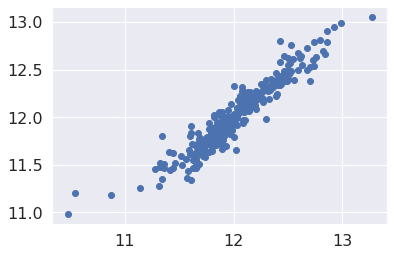

In [0]:
##plt.plot(X_training, lin_pred, color='blue')
plt.scatter(y_valid,predictions)

Decision Tree Regression

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtreg, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='random')
Best Score: 0.7312814973377141


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   11.9s finished


In [0]:
dtr = grid_dtr.best_estimator_
dtreg.fit(X_training, y_training)
dtr_pred = dtreg.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.7145339825922508
RMSE Score: 0.20420654142528366


In [0]:
scores_dtr = cross_val_score(dtreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.6956734229751256


In [0]:
print('MAE:', metrics.mean_absolute_error(y_valid, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_valid, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, dtr_pred)))

MAE: 0.14520576552439785
MSE: 0.04170031156087609
RMSE: 0.20420654142528366


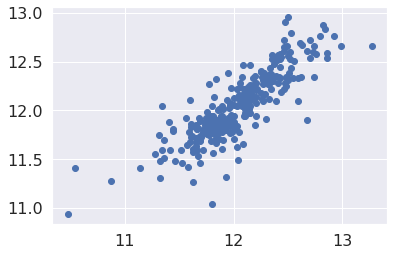

In [0]:
plt.scatter(y_valid,dtr_pred)

Random Forest Regression

In [0]:
rfr = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rfr, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.8min finished


Best RandomForestRegressor Model: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Best Score: 0.8690372157345403


In [0]:
rf = grid_rf.best_estimator_
rfr.fit(X_training, y_training)
rf_pred = rfr.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8835121008428852
RMSE Score: 0.13044662531028822


In [0]:
scores_rf = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.8725258792912827


In [0]:
print('MAE:', metrics.mean_absolute_error(y_valid, rf_pred))
print('MSE:', metrics.mean_squared_error(y_valid, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, rf_pred)))

MAE: 0.08886509219329346
MSE: 0.017016322054842725
RMSE: 0.13044662531028822


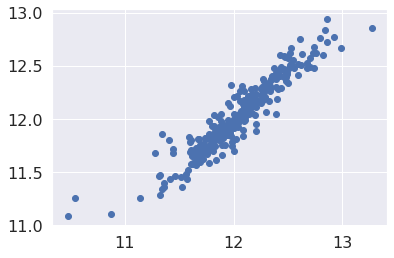

In [0]:
plt.scatter(y_valid,rf_pred)    ## Sales price v/s predicted Sale price

## 7. Model Comparision

In [0]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"],
    "R Squared" : [str(r2_lin)[0:5],  str(r2_dtr)[0:5], str(r2_rf)[0:5] ],
    "RMSE" : [str(rmse_lin)[0:8],  str(rmse_dtr)[0:8], str(rmse_rf)[0:8]]
})
model_performances.round(4)

print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)


Sorted by R Squared:


,Model,R Squared,RMSE
0,Linear Regression,0.898,0.121870
2,Random Forest Regressor,0.883,0.130446
1,Decision Tree Regressor,0.714,0.204206


R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit.

As per our study Linear Regression model has lower RMSE value. 